In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## Analisi delle caratteristiche del dataset

In [2]:
data = pd.read_csv("cal-housing.csv")

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Esaminiamo i valori della colonna contente valori categorici

In [4]:
val = data['ocean_proximity'].value_counts()
count = pd.DataFrame(val).rename({'ocean_proximity': 'Count'}, axis=1)
index = count.index

relative = []
for n in val:
    relative.append(n/len(data)*100)
relative_df = pd.DataFrame(relative, index=count.index, columns=["%"])
pd.concat([count, relative_df], axis=1)

,Count,%
<1H OCEAN,9136,44.263566
INLAND,6551,31.739341
NEAR OCEAN,2658,12.877907
NEAR BAY,2290,11.094961
ISLAND,5,0.024225


Guardiamo meglio il contenuto delle nostre colonne

In [5]:
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/len(dataset) 
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)

report_missing_data(data)

                    Total   Percent
total_bedrooms        207  0.010029
ocean_proximity         0  0.000000
median_house_value      0  0.000000
median_income           0  0.000000
households              0  0.000000
population              0  0.000000
total_rooms             0  0.000000
housing_median_age      0  0.000000
latitude                0  0.000000
longitude               0  0.000000


Guardiamo la distribuzione dei valori nel dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3C4410F48>,
      dtype=object)

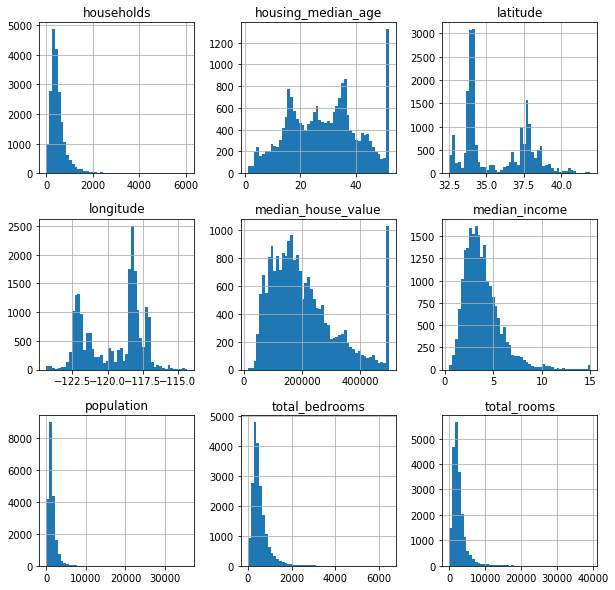

In [6]:
data.hist(bins=50, figsize=(10,10))

Gli attributi housing_median_age e median_house_value hanno una struttura particolare: entrambi hanno un picco nel numero di elementi in corrispondenza del valore massimo. Probabilmente i valori sono stati cappati a questo valore.

Guardiamo come è distribuito il valore delle case in base alla loro posizone geografica dato che abbiamo latitudine e longitudine

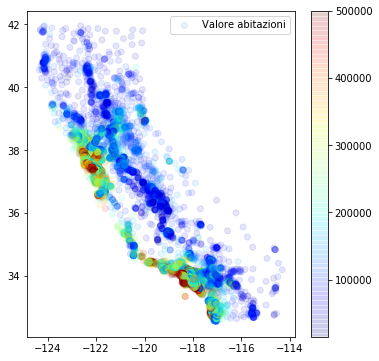

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1,c=data['median_house_value'],cmap=plt.get_cmap("jet"),label='Valore abitazioni')
plt.colorbar()
plt.legend()

Innanizi tutto si può apprezzare come otteniamo una rappresentazione simbolica della California basato sul valore delle abitazioni. La maggior parte delle case di valore si trova in corrispondenza della costa, in particolare in corrispondenza dei due maggiori centri abitanti, Los Angeles e San Francisco (solo qui si hanno i valori massimi)

Analizziamo la correlazione tra le variabili rispetto a median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


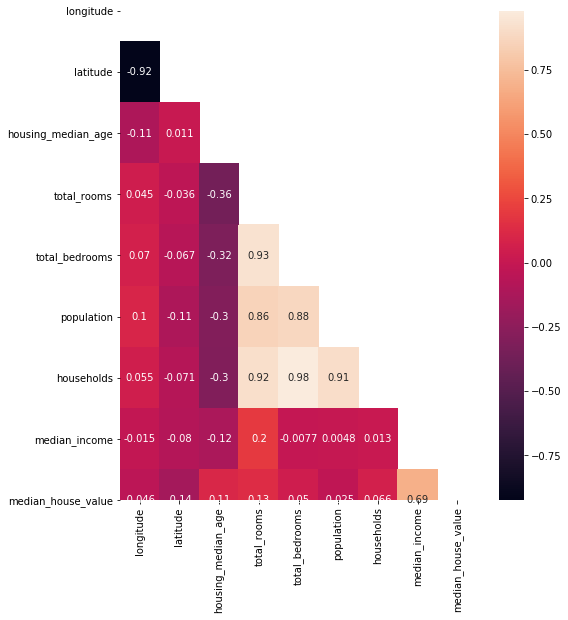

In [8]:
def get_corr_data(data):
    corr_matrix = data.corr(method='pearson')
    return corr_matrix['median_house_value'].sort_values(ascending=False)

def get_corr_heatmap(data):
    corr_matrix = data.corr(method='pearson')
    plt.figure(figsize=(8,9))
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_matrix, mask=mask, annot=True)
    

print(get_corr_data(data))
get_corr_heatmap(data)

median_house_value    1.000000
median_income         0.676778
total_rooms           0.205952
households            0.112737
total_bedrooms        0.086259
housing_median_age    0.074855
population            0.003839
longitude            -0.069667
latitude             -0.165739
Name: median_house_value, dtype: float64


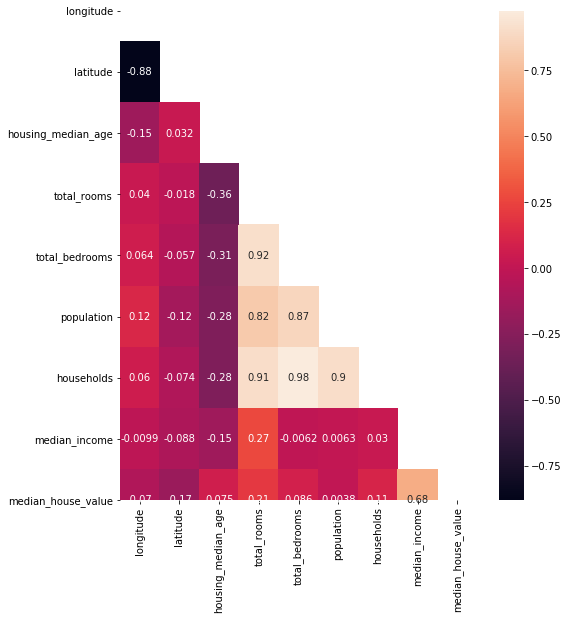

In [9]:
def get_corr_data2(data):
    corr_matrix = data.corr(method='spearman')
    return corr_matrix['median_house_value'].sort_values(ascending=False)

def get_corr_heatmap2(data):
    corr_matrix = data.corr(method='spearman')
    plt.figure(figsize=(8,9))
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_matrix, mask=mask, annot=True)
    

print(get_corr_data2(data))
get_corr_heatmap2(data)

Stampiamo gli scatter plot degli attributi con più alta correlazione

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3C7D13D88>,
      dtype=object)

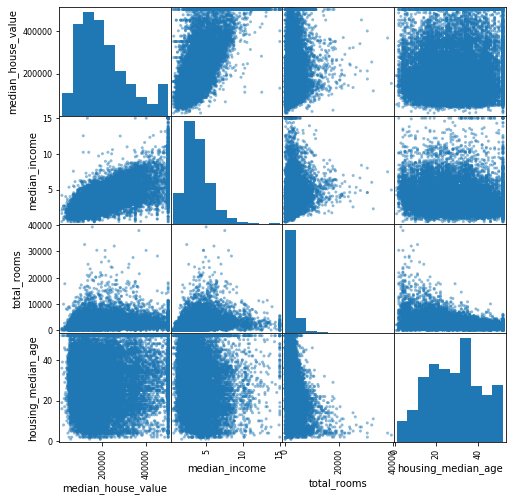

In [10]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(data[attributes], figsize=(8,8))

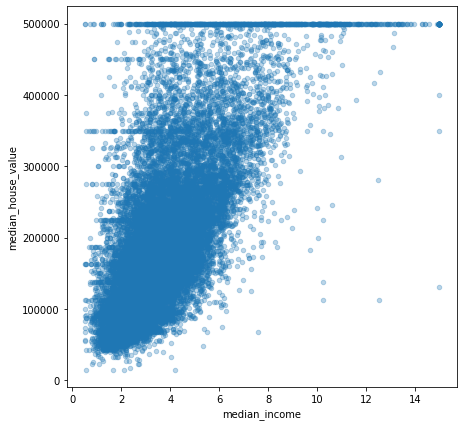

In [11]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3, figsize=(7,7))

## Pulizia del dataset

E' importante pulire il dataset per sistemare anomalie nei dati e sistemare i valori mancanti. I task che vengono svolti in questa fase sono:  
    - Rimuovere dati estranei e outliers   
    - Riempire valori mancanti  
    - Conformare i dati a un livello standardizzato  
    - Mascherare eventuali dati sensibili  

In [4]:
data1 = data.copy()

Guardiamo i box plot per capire se e quali features hanno degli outliers

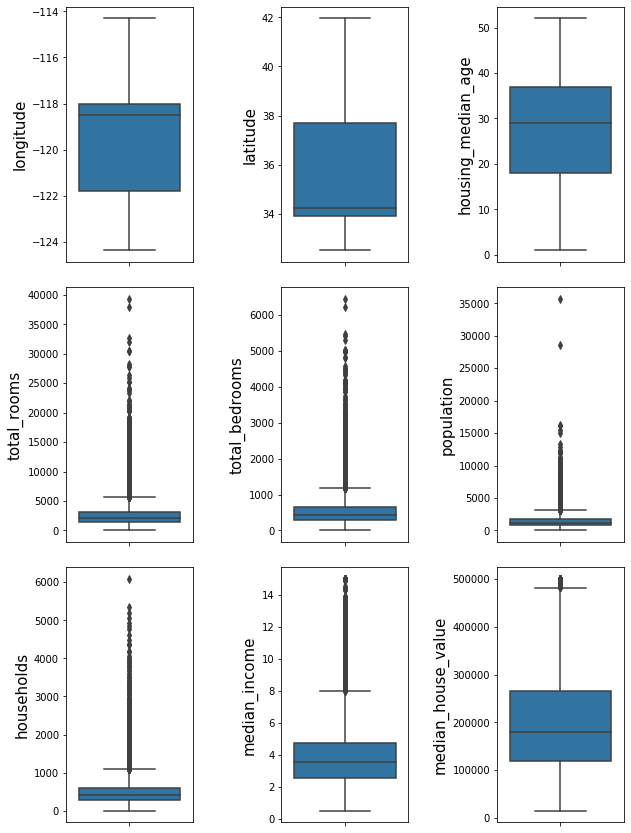

In [51]:
# create boxplot with a different y scale for different rows
selection = list(data1.columns)
selection.remove("ocean_proximity")
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 15)
fig.subplots_adjust(hspace=0.1, wspace=0.7)
for i, col in enumerate(selection):
    ax = sns.boxplot(y=data1[col], ax=axes.flatten()[i])
    ax.set_ylabel(col,fontsize=15)
plt.show()

Si può vedere come ci siano una gran quantità di outliers nel dataset, rimuoviamoli usando il metodo del range interquantile https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [104]:
# calcoliamo il range interquantile
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
# rimuoviamo i valori fuoi dal range interquanitle*1.5
data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15756.000000,15756.000000,15756.000000,15756.000000,15599.000000,15756.000000,15756.000000,15756.000000,15756.000000
mean,-119.613366,35.727713,30.012757,1972.300330,410.327777,1109.980452,384.618431,3.481475,178272.010409
std,2.003533,2.183939,12.112926,919.574236,184.950673,511.003471,172.730368,1.358738,85027.429824
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.940000,20.000000,1315.000000,277.000000,742.750000,263.000000,2.437500,110075.000000
50%,-118.750000,34.420000,31.000000,1869.500000,392.000000,1063.000000,370.000000,3.330200,165000.000000
75%,-118.030000,37.750000,38.000000,2574.000000,533.000000,1453.000000,500.000000,4.375000,232200.000000
max,-114.490000,41.950000,52.000000,4462.000000,916.000000,2513.000000,855.000000,7.266000,415000.000000


Considerando invece soltanto la colonna target

In [138]:
datap = data.copy()
f = "median_house_value"
Q1 = data1[f].quantile(0.25)
Q3 = data1[f].quantile(0.75)
IQR = Q3 - Q1
datap = datap[~((datap[f] > (Q3 + 1.5 * IQR)))]
datap.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19046.00000,19046.000000,19046.000000,19046.000000,18853.000000,19046.000000,19046.000000,19046.000000,19046.000000
mean,-119.55477,35.660743,28.251601,2609.143390,539.818278,1447.965767,501.178568,3.605938,183889.561903
std,2.00549,2.158252,12.460269,2182.089677,424.230897,1150.521957,384.743312,1.496422,86807.467553
min,-124.35000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.71000,33.930000,18.000000,1433.000000,297.000000,800.000000,281.000000,2.503075,114300.000000
50%,-118.51000,34.270000,28.000000,2101.000000,436.000000,1184.000000,410.000000,3.395800,169800.000000
75%,-117.99000,37.730000,37.000000,3109.000000,647.000000,1753.000000,605.000000,4.505150,239375.000000
max,-114.31000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,415300.000000


L'1% delle entry nella colonna total_bedrooms contiene valori NaN. Possiamo sostiuire questi con la media della colonna stessa

In [15]:
data1 = data1.fillna(data1.median())

Dato che abbiamo features che sono su scale molto differenti, normalizziamo il dataset usando z-scoring

In [16]:
def normalize(X):
    return (X - X.mean())/X.std()

cat_vals = data1['ocean_proximity']
data1 = normalize(data1.drop(['ocean_proximity'], axis=1))
data1 = pd.concat([data1, cat_vals], axis=1)
data1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.762100e+04,1.762100e+04,1.762100e+04,1.762100e+04,1.762100e+04,1.762100e+04,1.762100e+04,1.762100e+04,1.762100e+04
mean,-1.104804e-12,4.284512e-15,1.331612e-15,3.142471e-16,2.562441e-17,2.696265e-16,-2.830215e-17,-1.665672e-14,2.469823e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.367342e+00,-1.456512e+00,-2.333566e+00,-1.963584e+00,-2.010452e+00,-1.980119e+00,-2.016110e+00,-2.130384e+00,-1.835081e+00
25%,-1.085430e+00,-8.103531e-01,-8.591637e-01,-7.065105e-01,-7.139664e-01,-7.165109e-01,-7.098515e-01,-7.505459e-01,-7.908659e-01
50%,5.007491e-01,-6.441979e-01,4.185975e-02,-1.535081e-01,-1.541202e-01,-1.434985e-01,-1.465579e-01,-1.282401e-01,-1.818354e-01
75%,7.850642e-01,9.435076e-01,6.971496e-01,5.853543e-01,5.915858e-01,6.000929e-01,6.012628e-01,6.310935e-01,5.829191e-01
max,2.550811e+00,2.886601e+00,1.843907e+00,3.247822e+00,3.297887e+00,3.200178e+00,3.276907e+00,3.073209e+00,3.148100e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3CA0B8A88>,
      dtype=object)

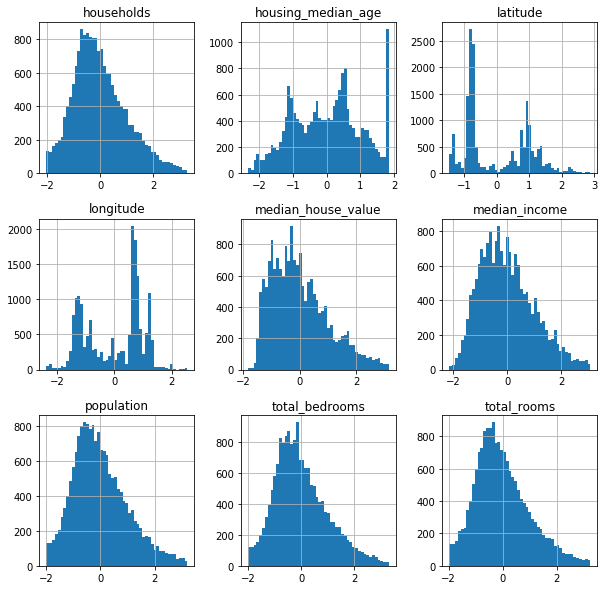

In [17]:
data1.hist(bins=50, figsize=(10,10))

Occupiamoci ora dei valori categorici: applichiamo one-hot encoding per trasformare la colonna, ma prima cambiamo i record island con near ocean dato che sono solamente 5.

In [18]:
data1 = data1.replace("ISLAND", "NEAR OCEAN")
data1 = pd.get_dummies(data1)

## Arricchimento del dataset

Creiamo delle nuove colonne a partire dai dati che già abbiamo. Dato che i dati in una riga sono relativi ad un insieme di case possiamo calcolare i rapporti tra (numero di stanze/numero di abitazioni), (popolazione del lotto/numero di abitazioni) e (numero di camere da letto/numero di stanze)

In [19]:
data2 = data1.copy()
data2['rooms_per_household']=data2['total_rooms']/data2['households']
data2['population_per_household']=data2['population']/data2['households']
data2['bedrooms_per_room']=data2['total_bedrooms']/data2['total_rooms']
data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,population_per_household,bedrooms_per_room
2,-1.314877,0.994277,1.843907,-0.622278,-1.158217,-1.163659,-1.166313,2.550938,1.760449,0,0,1,0,0.533543,0.997724,1.861252
3,-1.319865,0.994277,1.843907,-0.798983,-0.954224,-1.060981,-0.962362,1.432616,1.645256,0,0,1,0,0.830231,1.102475,1.194299
4,-1.319865,0.994277,1.843907,-0.475788,-0.750232,-1.049388,-0.768123,0.187797,1.654855,0,0,1,0,0.619416,1.366172,1.576821
5,-1.319865,0.994277,1.843907,-1.124009,-1.053954,-1.301116,-1.088618,0.319837,0.881568,0,0,1,0,1.032510,1.195200,0.937674
6,-1.319865,0.989662,1.843907,0.355547,0.197200,-0.173308,0.470151,0.058181,1.196216,0,0,1,0,0.756239,-0.368622,0.554639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.741259,1.746591,-0.367696,-0.440996,-0.324114,-0.585679,-0.423349,-1.395782,-1.162044,0,1,0,0,1.041685,1.383442,0.734959
20636,-0.801115,1.751207,-0.941075,-1.327265,-1.339544,-1.395514,-1.472240,-0.705447,-1.172710,0,1,0,0,0.901527,0.947885,1.009251
20637,-0.806103,1.723514,-1.022986,0.098273,0.179068,-0.317390,0.076817,-1.299004,-1.010586,0,1,0,0,1.279308,-4.131755,1.822149
20638,-0.855983,1.723514,-0.941075,-0.262461,-0.165453,-0.757914,-0.331085,-1.183174,-1.091648,0,1,0,0,0.792728,2.289180,0.630392


median_house_value            1.000000
median_income                 0.629279
ocean_proximity_<1H OCEAN     0.290982
total_rooms                   0.191399
ocean_proximity_NEAR BAY      0.159576
ocean_proximity_NEAR OCEAN    0.141187
households                    0.119704
housing_median_age            0.097624
total_bedrooms                0.090727
population_per_household      0.023877
bedrooms_per_room             0.009153
population                   -0.011846
rooms_per_household          -0.012373
longitude                    -0.043441
latitude                     -0.157238
ocean_proximity_INLAND       -0.510555
Name: median_house_value, dtype: float64


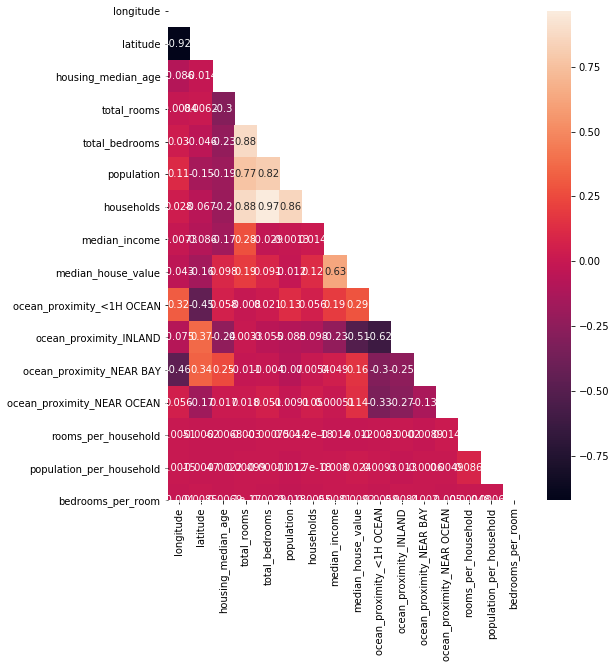

In [20]:
print(get_corr_data(data2))
get_corr_heatmap(data2)

## Correlazione tra features

Calcoliamo il VIF per ogni variabile indipendente nel dataset

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(X):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    return vif_data

# the independent variables set
X = data2.drop(["median_house_value"], axis=1)
  
print(compute_vif(X))

                       feature        VIF
0                    longitude  17.531443
1                     latitude  19.848921
2           housing_median_age   1.291341
3                  total_rooms   9.794901
4               total_bedrooms  19.593584
5                   population   4.336131
6                   households  21.248981
7                median_income   2.258775
8    ocean_proximity_<1H OCEAN   1.384672
9       ocean_proximity_INLAND   2.205500
10    ocean_proximity_NEAR BAY   1.421758
11  ocean_proximity_NEAR OCEAN   1.269043
12         rooms_per_household   1.008038
13    population_per_household   1.008249
14           bedrooms_per_room   1.000979


In [7]:
def normalize(X):
    return (X - X.mean())/X.std()

def norm_dataset(data):
    cat_vals = data['ocean_proximity']
    data_norm = normalize(data.drop(['ocean_proximity'], axis=1))
    data_norm = pd.concat([data_norm, cat_vals], axis=1)
    return data_norm

dataA = pd.read_csv("cal-housing.csv")
dataA = data.replace("ISLAND", "NEAR OCEAN")
# calcoliamo il range interquantile
Q1 = dataA.quantile(0.25)
Q3 = dataA.quantile(0.75)
IQR = Q3 - Q1
# rimuoviamo i valori fuoi dal range interquanitle*1.5
dataA = dataA[~((dataA < (Q1 - 1.5 * IQR)) | (dataA > (Q3 + 1.5 * IQR))).any(axis=1)]
dataA = dataA.dropna()
dataA['rooms_per_household']=dataA['total_rooms']/dataA['households']
dataA['population_per_household']=dataA['population']/dataA['households']
dataA['bedrooms_per_room']=dataA['total_bedrooms']/dataA['total_rooms']
dataB = norm_dataset(dataA)
dataB = pd.get_dummies(dataB, drop_first=True)
X = dataB.drop(["median_house_value"], axis=1)


Rimuoviamo le features che hanno un FIV maggiore di 5

In [85]:
a = compute_vif(X).set_index('feature')
b = get_corr_data(dataB)
c = pd.concat([b, a], axis=1)
c

,median_house_value,VIF
median_house_value,1.000000,NaN
median_income,0.629119,2.457472
total_rooms,0.190996,17.889070
ocean_proximity_NEAR BAY,0.160008,1.424579
ocean_proximity_NEAR OCEAN,0.139393,1.224668
households,0.119362,38.278115
housing_median_age,0.098237,1.299174
total_bedrooms,0.091219,38.447965
rooms_per_household,0.088137,2.017420
population,-0.012318,7.563978


In [79]:
print("\nRemove total_bedrooms\n")
X.drop(["total_bedrooms"], axis=1, inplace=True)
dataB.drop(["total_bedrooms"], axis=1, inplace=True)
a = compute_vif(X).set_index('feature')
b = get_corr_data(dataB)
c = pd.concat([b, a], axis=1)
c


Remove total_bedrooms



,median_house_value,VIF
median_house_value,1.000000,NaN
median_income,0.629119,2.261208
total_rooms,0.190996,13.590502
ocean_proximity_NEAR BAY,0.160008,1.423456
ocean_proximity_NEAR OCEAN,0.139393,1.224082
households,0.119362,17.469052
housing_median_age,0.098237,1.292044
rooms_per_household,0.088137,1.675275
population,-0.012318,7.388394
longitude,-0.043034,16.160893


In [80]:
print("\nRemove longitude\n")
X.drop(["longitude"], axis=1, inplace=True)
dataB.drop(["longitude"], axis=1, inplace=True)
a = compute_vif(X).set_index('feature')
b = get_corr_data(dataB)
c = pd.concat([b, a], axis=1)
c


Remove longitude



,median_house_value,VIF
median_house_value,1.000000,NaN
median_income,0.629119,2.107887
total_rooms,0.190996,13.444565
ocean_proximity_NEAR BAY,0.160008,1.250042
ocean_proximity_NEAR OCEAN,0.139393,1.053055
households,0.119362,17.389417
housing_median_age,0.098237,1.271572
rooms_per_household,0.088137,1.645914
population,-0.012318,7.367354
latitude,-0.157523,1.391320


In [81]:
print("\nRemove households\n")
X.drop(["households"], axis=1, inplace=True)
dataB.drop(["households"], axis=1, inplace=True)
a = compute_vif(X).set_index('feature')
b = get_corr_data(dataB)
c = pd.concat([b, a], axis=1)
c


Remove households



,median_house_value,VIF
median_house_value,1.000000,NaN
median_income,0.629119,2.068460
total_rooms,0.190996,5.668514
ocean_proximity_NEAR BAY,0.160008,1.243726
ocean_proximity_NEAR OCEAN,0.139393,1.049907
housing_median_age,0.098237,1.271022
rooms_per_household,0.088137,1.395421
population,-0.012318,5.253618
latitude,-0.157523,1.391311
population_per_household,-0.187734,1.588667


In [82]:
print("\nRemove population\n")
X.drop(["population"], axis=1, inplace=True)
dataB.drop(["population"], axis=1, inplace=True)
a = compute_vif(X).set_index('feature')
b = get_corr_data(dataB)
c = pd.concat([b, a], axis=1)
c


Remove population



,median_house_value,VIF
median_house_value,1.000000,NaN
median_income,0.629119,2.015848
total_rooms,0.190996,1.222975
ocean_proximity_NEAR BAY,0.160008,1.243471
ocean_proximity_NEAR OCEAN,0.139393,1.045083
housing_median_age,0.098237,1.270390
rooms_per_household,0.088137,1.255022
latitude,-0.157523,1.366375
population_per_household,-0.187734,1.065489
bedrooms_per_room,-0.198778,2.019879


In [39]:
X

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0.994277,1.843907,-0.622278,2.550938,1.334313,-0.149608,-1.441071,0,1,0
3,0.994277,1.843907,-0.798983,1.432616,0.227992,-0.390526,-0.527591,0,1,0
4,0.994277,1.843907,-0.475788,0.187797,0.435978,-0.737698,-0.733132,0,1,0
5,0.994277,1.843907,-1.124009,0.319837,-0.244707,-0.777079,0.259080,0,1,0
6,0.989662,1.843907,0.355547,0.058181,-0.168476,-0.787965,-0.387249,0,1,0
...,...,...,...,...,...,...,...,...,...,...
20635,1.746591,-0.367696,-0.440996,-1.395782,-0.117634,-0.378532,0.140219,1,0,0
20636,1.751207,-0.941075,-1.327265,-0.705447,0.360835,0.154052,-0.016343,1,0,0
20637,1.723514,-1.022986,0.098273,-1.299004,-0.045953,-0.601125,-0.016925,1,0,0
20638,1.723514,-0.941075,-0.262461,-1.183174,0.009556,-0.792887,0.061541,1,0,0


# Data skewed

https://www.quora.com/How-does-skewness-impact-regression-model

In [3]:
data2 = data.copy()
data2['rooms_per_household']=data2['total_rooms']/data2['households']
data2['population_per_household']=data2['population']/data2['households']
data2['bedrooms_per_room']=data2['total_bedrooms']/data2['total_rooms']
data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023038208808>,
      dtype=object)

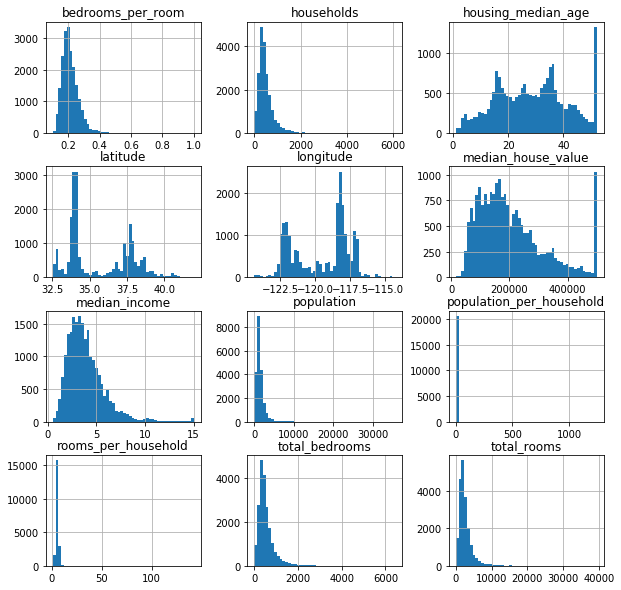

In [15]:
data2.hist(bins=50, figsize=(10,10))

In [5]:
features= data2.columns.to_list()
features.remove("ocean_proximity")
skewness=[]
for i in features:
    skewness.append([data2[i].skew()])
stock = pd.DataFrame(data=skewness,index=features,columns=['stock'])

data_no_skw = data2.copy()
data_no_skw1 = data2.copy()
data_no_skw2 = data2.copy()

for i in features:
    data_no_skw[i] = np.sqrt(data_no_skw[i])
    data_no_skw1[i] = np.cbrt(data_no_skw1[i])
    data_no_skw2[i] = np.log(data_no_skw2[i])
skewness=[]
skewness1=[]
skewness2=[]
for i in features:
    skewness.append(data_no_skw[i].skew())
    skewness1.append(data_no_skw1[i].skew())
    skewness2.append(data_no_skw2[i].skew())

tab = pd.DataFrame(list(zip(skewness , skewness1, skewness2)), index=features, columns=['sqrt','cbrt','log'])
tab = pd.concat([stock , tab] , axis = 1)
tab

C:\Users\Nicolas Facchinetti\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nicolas Facchinetti\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,stock,sqrt,cbrt,log
longitude,-0.297801,NaN,-0.288030,NaN
latitude,0.465953,0.437358,0.428036,0.409685
housing_median_age,0.060331,-0.472510,-0.701693,-1.289170
total_rooms,4.147343,1.355500,0.629034,-1.097338
total_bedrooms,3.459546,1.206045,0.561673,-1.067455
population,4.935858,1.224655,0.522587,-1.070786
households,3.410438,1.126872,0.478150,-1.124358
median_income,1.646657,0.689225,0.405834,-0.146082
median_house_value,0.977763,0.439382,0.244259,-0.173175
rooms_per_household,20.697869,4.850183,2.919271,0.868061


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4F1C4A88>,
      dtype=object)

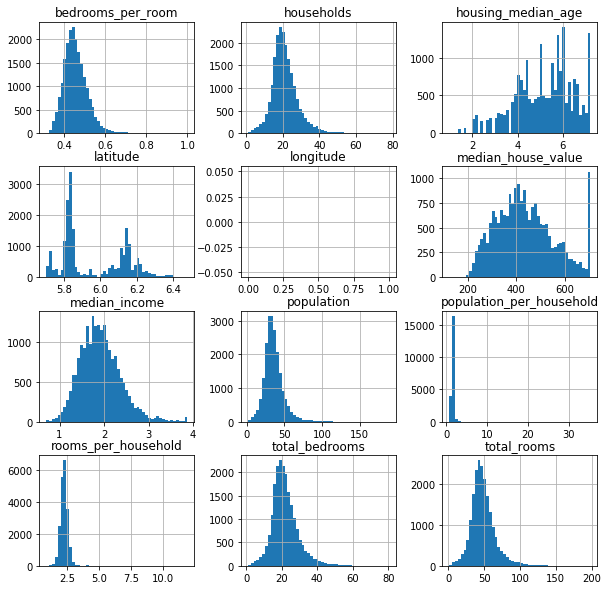

In [6]:
data_no_skw.hist(bins=50, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4EF91A88>,
      dtype=object)

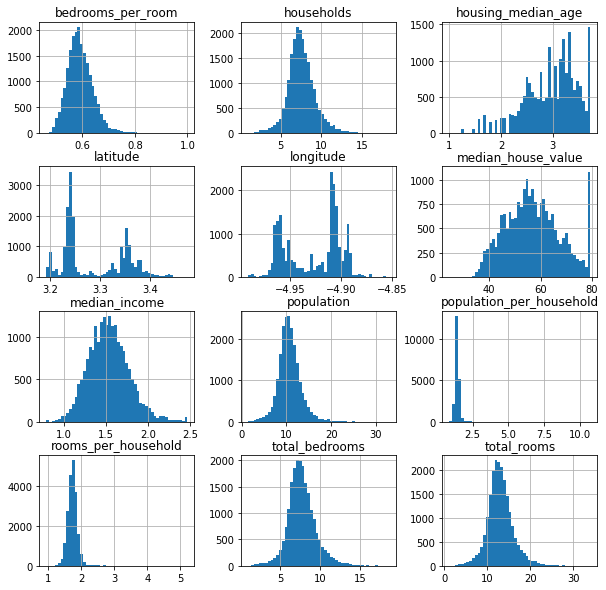

In [7]:
data_no_skw1.hist(bins=50, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF52ECC348>,
      dtype=object)

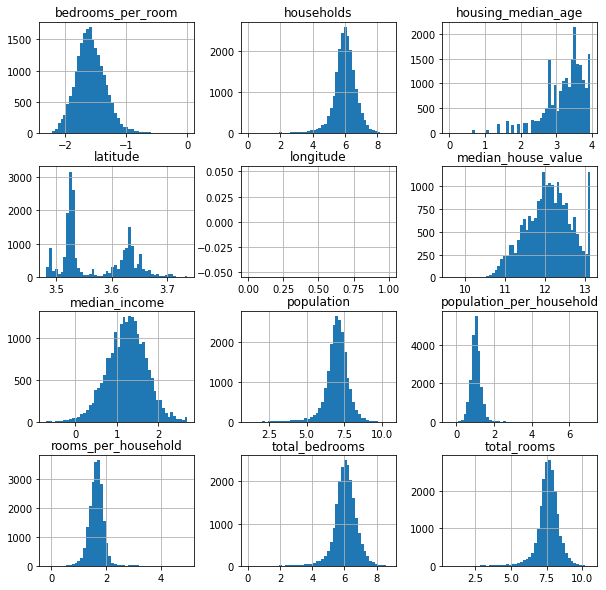

In [8]:
data_no_skw2.hist(bins=50, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF546A9148>,
      dtype=object)

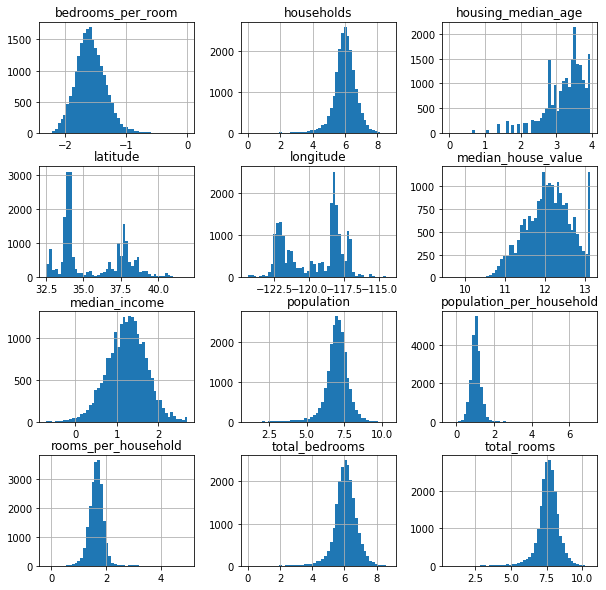

In [13]:
features= data2.columns.to_list()
features.remove("ocean_proximity")
features.remove("longitude")
features.remove("latitude")

data_no_skw = data2.copy()

for i in features:
    data_no_skw[i] = np.log(data_no_skw[i])
data_no_skw.hist(bins=50, figsize=(10,10))

## Principal Component Analisys

Carichiamo le varie versioni per farne l'analisi delle componenti principali. Rimuoviamo la colonna da predirre e normalizzaziamo gli attributi categorici (assunsione di pca che tutte le feature siano normalizzate)

In [3]:
from transform import PCA

def normalize(X):
    return (X - X.mean())/X.std()

def prepare_for_pca(data):
    data = data.drop("median_house_value", axis =1)
    cols = ["ocean_proximity_NEAR BAY", "ocean_proximity_INLAND", "ocean_proximity_NEAR OCEAN"]
    for c in cols:
        data[c] = normalize(data[c])
    return data

dataA = pd.read_pickle("./base.pkl")
dataB = pd.read_pickle("./base_no_out.pkl")
dataC = pd.read_pickle("./add_features.pkl")
dataD = pd.read_pickle("./log.pkl")
dataE = pd.read_pickle("./removed.pkl")

In [4]:
dataA = ("base", prepare_for_pca(dataA))
dataB = ("base no out", prepare_for_pca(dataB))
dataC = ("add features", prepare_for_pca(dataC))
dataD = ("log", prepare_for_pca(dataD))
dataE = ("removed", prepare_for_pca(dataE))
dataPCA = [dataA, dataB, dataC, dataD, dataE]

Calcoliamo la somma della varianza ottenuta dagli eigenvalues per ogni data set

In [9]:
variances = list()
dataset_names = list()
eigenvalues = list()

for d in dataPCA:
    pca = PCA(d[1])
    variance = pca.get_percentage_of_variance()
    variances.append(np.cumsum(variance))
    dataset_names.append(d[0])
    eigenvalues.append(pca.eigenvalues)
variances

[array([0.35619381, 0.56092383, 0.70175797, 0.79903155, 0.887958  ,
        0.94019645, 0.97771938, 0.99085184, 0.99629005, 0.99866973,
        1.        ]),
 array([0.33704246, 0.54235318, 0.68454275, 0.79072161, 0.88035444,
        0.93314967, 0.97070084, 0.98933714, 0.99558871, 0.99808141,
        1.        ]),
 array([0.26552021, 0.43718851, 0.58201591, 0.69459678, 0.77475754,
        0.8394954 , 0.89127851, 0.93775517, 0.96851159, 0.9867854 ,
        0.99438055, 0.99713614, 0.99897829, 1.        ]),
 array([0.28068803, 0.46650309, 0.62513564, 0.73821968, 0.81749069,
        0.8818717 , 0.9330102 , 0.96613803, 0.98720318, 0.99822613,
        1.        , 1.        , 1.        , 1.        ]),
 array([0.21343748, 0.37660802, 0.52850723, 0.63217144, 0.72989788,
        0.81645583, 0.88050442, 0.93731995, 0.97238616, 1.        ])]

Guardiamo anche il valore degli eigenvalues nei diversi casi

In [10]:
eigenvalues

[array([3.91813196, 2.25203013, 1.54917558, 1.07000933, 0.97819096,
        0.57462297, 0.41275221, 0.14445711, 0.05982032, 0.02617642,
        0.01463301]),
 array([3.70746702, 2.25841796, 1.56408529, 1.16796743, 0.98596108,
        0.5807476 , 0.41306285, 0.20499929, 0.06876723, 0.02741972,
        0.02110451]),
 array([3.71728292, 2.40335626, 2.02758358, 1.57613217, 1.12225063,
        0.90632997, 0.72496355, 0.65067333, 0.4305899 , 0.25583328,
        0.10633214, 0.03857827, 0.02579011, 0.01430388]),
 array([ 3.92963235e+00,  2.60141097e+00,  2.22085566e+00,  1.58317661e+00,
         1.10979407e+00,  9.01334136e-01,  7.15939051e-01,  4.63789643e-01,
         2.94912067e-01,  1.54321297e-01,  2.48341473e-02,  8.25282092e-16,
        -1.15790897e-16, -5.01324378e-16]),
 array([2.13437484, 1.63170539, 1.5189921 , 1.03664207, 0.97726441,
        0.86557949, 0.64048588, 0.56815531, 0.35066211, 0.2761384 ])]

Troviamo quindi quante componenti tenere per ogni dataset per avere almeno l'80% e il 90% della variabilità e quanti eigenvalues hanno maggiori di 1

In [24]:
idxs80 = list()
idxs90 = list()
neigen = list()
for var in variances:
    idx80 = [i for i, j in enumerate(var) if j >= 0.8]
    idx90 = [i for i, j in enumerate(var) if j >= 0.9]
    idxs80.append(idx80[0]+1) #the array idx start from 0
    idxs90.append(idx90[0]+1)
    
for var in eigenvalues:  
    idx = [i for i, j in enumerate(var) if j < 1]
    neigen.append(idx[0])
    
idxs = {"80% variability": idxs80, "90% varibility": idxs90, "N eigevalues > 1": neigen}
pd.DataFrame(idxs, index=dataset_names)

,80% variability,90% varibility,N eigevalues > 1
base,5,6,4
base no out,5,6,4
add features,6,8,5
log,5,7,5
removed,6,8,4
